In [6]:
from glob import glob
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import cnvlib

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250

In [3]:
sample_names = {
            "1285_covaris2_DNA_10ng_1_S1.consensus.dedup":"FFPE_10ng_1",
            "1285_covaris2_DNA_10ng_2_S2.consensus.dedup":"FFPE_10ng_2",
            "1285_covaris2_DNA_50ng_S3.consensus.dedup":"FFPE_50ng",
            "1285_covaris2_DNA_200ng_S4.consensus.dedup":"FFPE_200ng",
            "FRFZ-ready.hg19.sorted":"FRFZ"}

In [32]:
a_df = a.data
a_df = a_df[a_df['log2'] > -5]
a_df

chromosome      start        end  \
0            chr1      65831      65973   
1            chr1      69481      69600   
2            chr1     721381     721519   
3            chr1     721530     721806   
4            chr1     721851     721942   
5            chr1     762095     762275   
6            chr1     762280     762414   
7            chr1     762420     762565   
8            chr1     777259     777349   
9            chr1     777391     777481   
10           chr1     777482     777642   
11           chr1     783061     783151   
12           chr1     792270     792446   
13           chr1     861266     861496   
14           chr1     865582     865787   
15           chr1     866331     866507   
16           chr1     871064     871262   
17           chr1     874367     874575   
18           chr1     874612     874816   
19           chr1     876485     876719   
20           chr1     877519     877733   
21           chr1     877806     878088   
22           chr1     878173     878465   
23           chr1     878532     878652   
24           chr1     878657     878777   
25           chr1     879125     879593   
26           chr1     880158     880279   
27           chr1     880312     880432   
28           chr1     880437     880557   
29           chr1     880987     881117   
...           ...        ...        ...   
224818       chrX  154464505  154464689   
224819       chrX  154466947  154467146   
224820       chrX  154490070  154490561   
224821       chrX  154493310  154493574   
224822       chrX  154507140  154507372   
224823       chrX  154508402  154508669   
224824       chrX  154509211  154509454   
224825       chrX  154528079  154528275   
224826       chrX  154528280  154528501   
224827       chrX  154563641  154563842   
224828       chrX  154577806  154577991   
224829       chrX  154578868  154579010   
224830       chrX  154721210  154721352   
224831       chrX  154722230  154722414   
224832       chrX  154736529  154736832   
224833       chrX  154741286  154741486   
224834       chrX  154743584  154743955   
224835       chrX  154754041  154754325   
224836       chrX  154774732  154774974   
224837       chrY    5483203    5483362   
224838       chrY   13309513   13309785   
224839       chrY   13310524   13310614   
224840       chrY   13310628   13310762   
224841       chrY   13311429   13311584   
224842       chrY   13573053   13573233   
224843       chrY   14107068   14107158   
224844       chrY   14107171   14107576   
224845       chrY   14475400   14475490   
224846       chrY   16952285   16952979   
224847       chrY   21154393   21154558   

                                                     gene      log2  \
0                                                       - -2.734870   
1       ref|OR4F5,ref|NM_001005484,ens|ENST00000335137... -0.008962   
2       ens|ENST00000593022,ens|ENST00000586288,ens|EN... -0.405486   
3       ens|ENST00000593022,ens|ENST00000586288,ens|EN...  0.476840   
4       ens|ENST00000593022,ens|ENST00000586288,ens|EN... -2.194340   
5       ref|LINC00115,ref|NR_024321,ens|ENST0000047379... -0.783012   
6       ref|LINC00115,ref|NR_024321,ens|ENST0000047379... -1.104180   
7       ref|LINC00115,ref|NR_024321,ens|ENST0000047379... -0.660145   
8       ref|LINC01128,ref|NR_047523,ref|NR_047524,ref|... -0.562560   
9       ref|LINC01128,ref|NR_047523,ref|NR_047524,ref|... -0.972861   
10      ref|LINC01128,ref|NR_047523,ref|NR_047524,ref|... -2.187090   
11      ref|LINC01128,ref|NR_047523,ref|NR_047524,ref|... -1.668420   
12      ref|LINC01128,ref|NR_047523,ref|NR_047524,ref|... -0.700283   
13      ref|SAMD11,ref|NM_152486,ens|ENST00000437963,e...  0.299646   
14      ref|SAMD11,ref|NM_152486,ens|ENST00000437963,e...  0.184761   
15      ref|SAMD11,ref|NM_152486,ens|ENST00000437963,e...  0.015366   
16      ref|SAMD11,ref|NM_152486,ens|ENST00000341065,e...  0.232266   
17      ref|SAMD11,ref|NM_152486,ens|ENST00000341065,e...  0.2

(-4, 4)

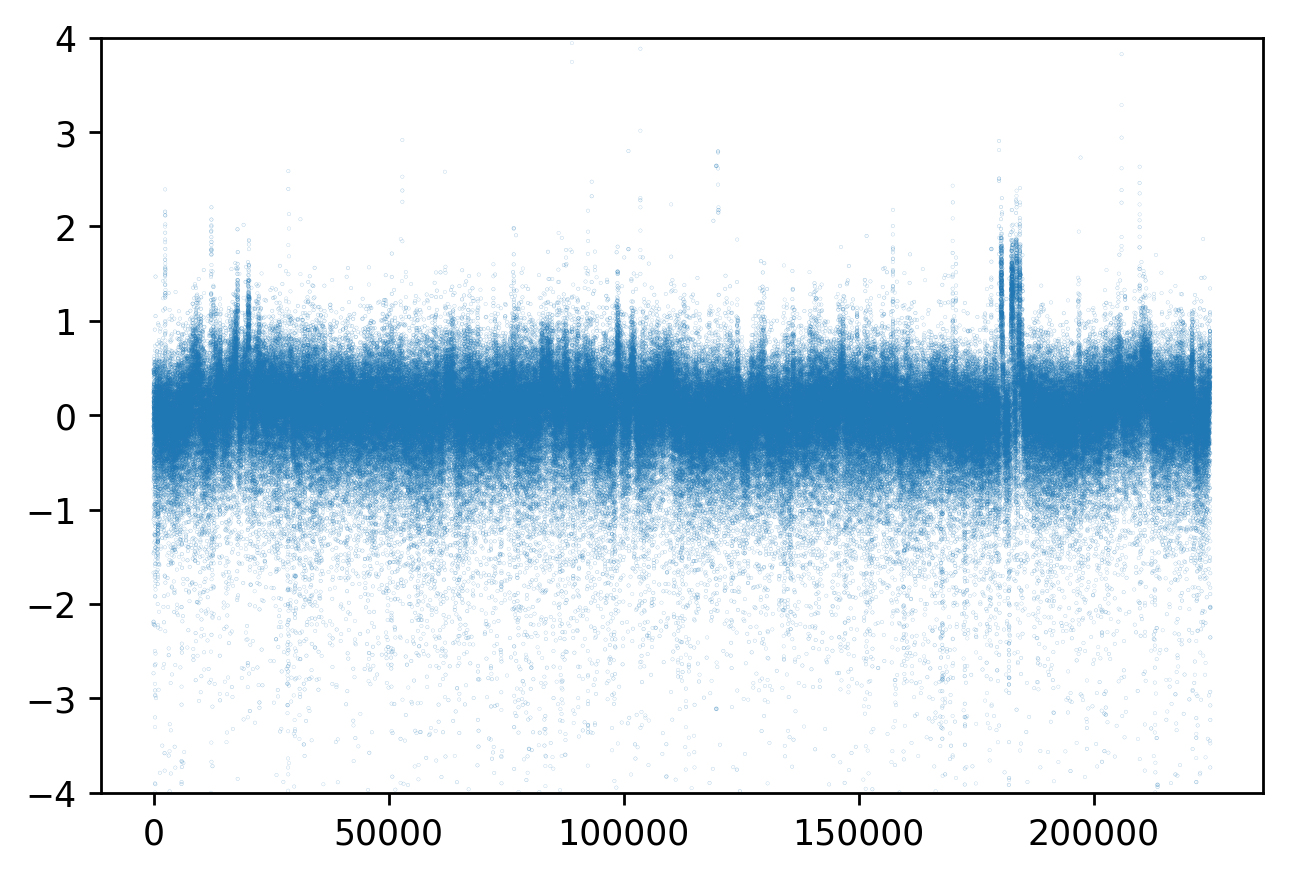

In [35]:
plt.scatter(a_df.index,
            a_df['log2'],
            alpha=0.5,
            s=a_df['weight']
           )
plt.ylim(-4,4)

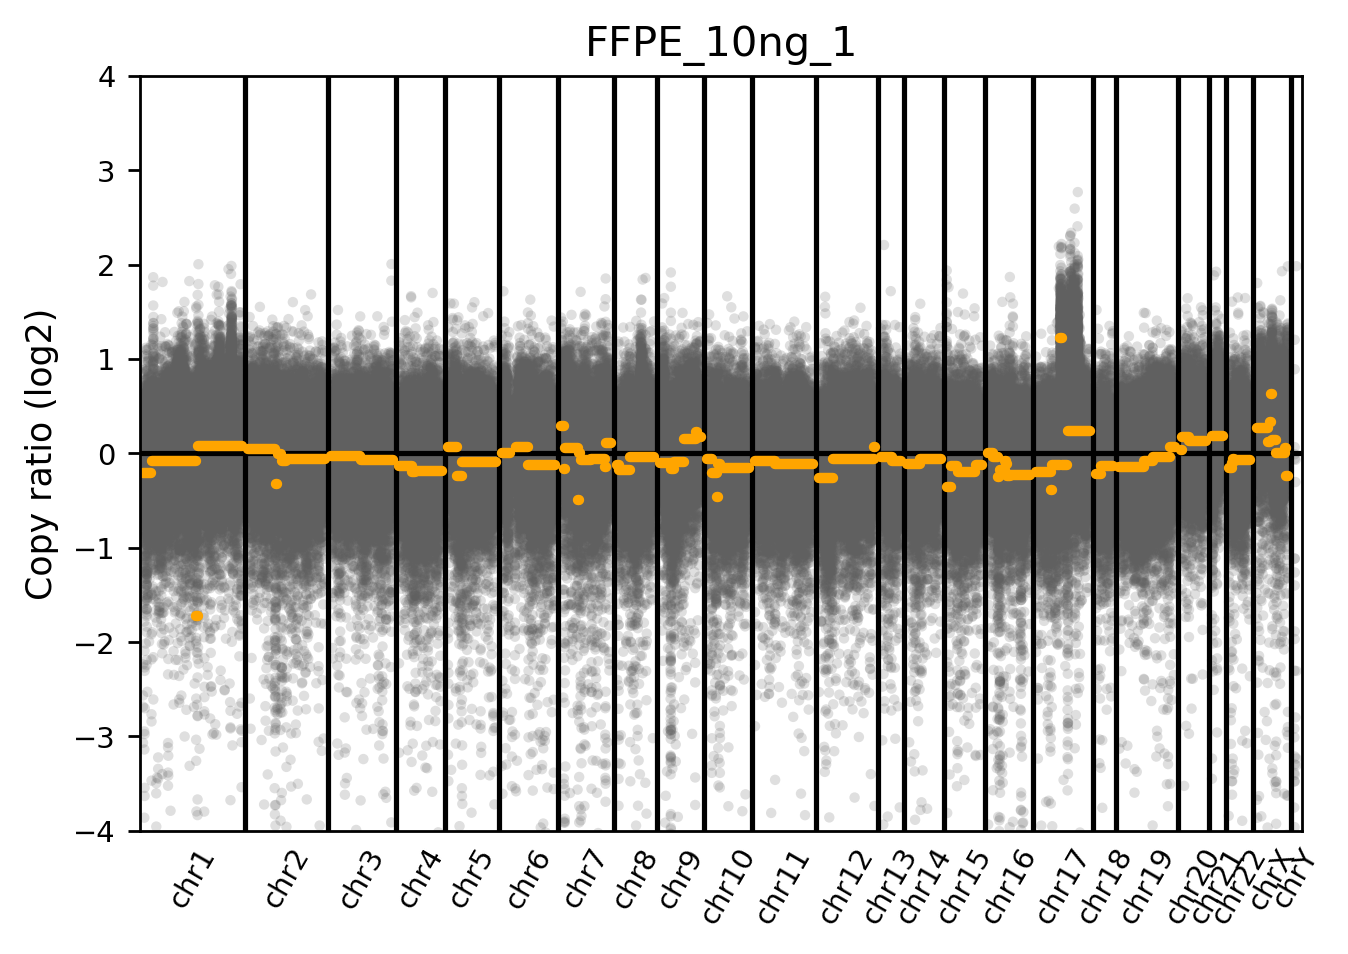

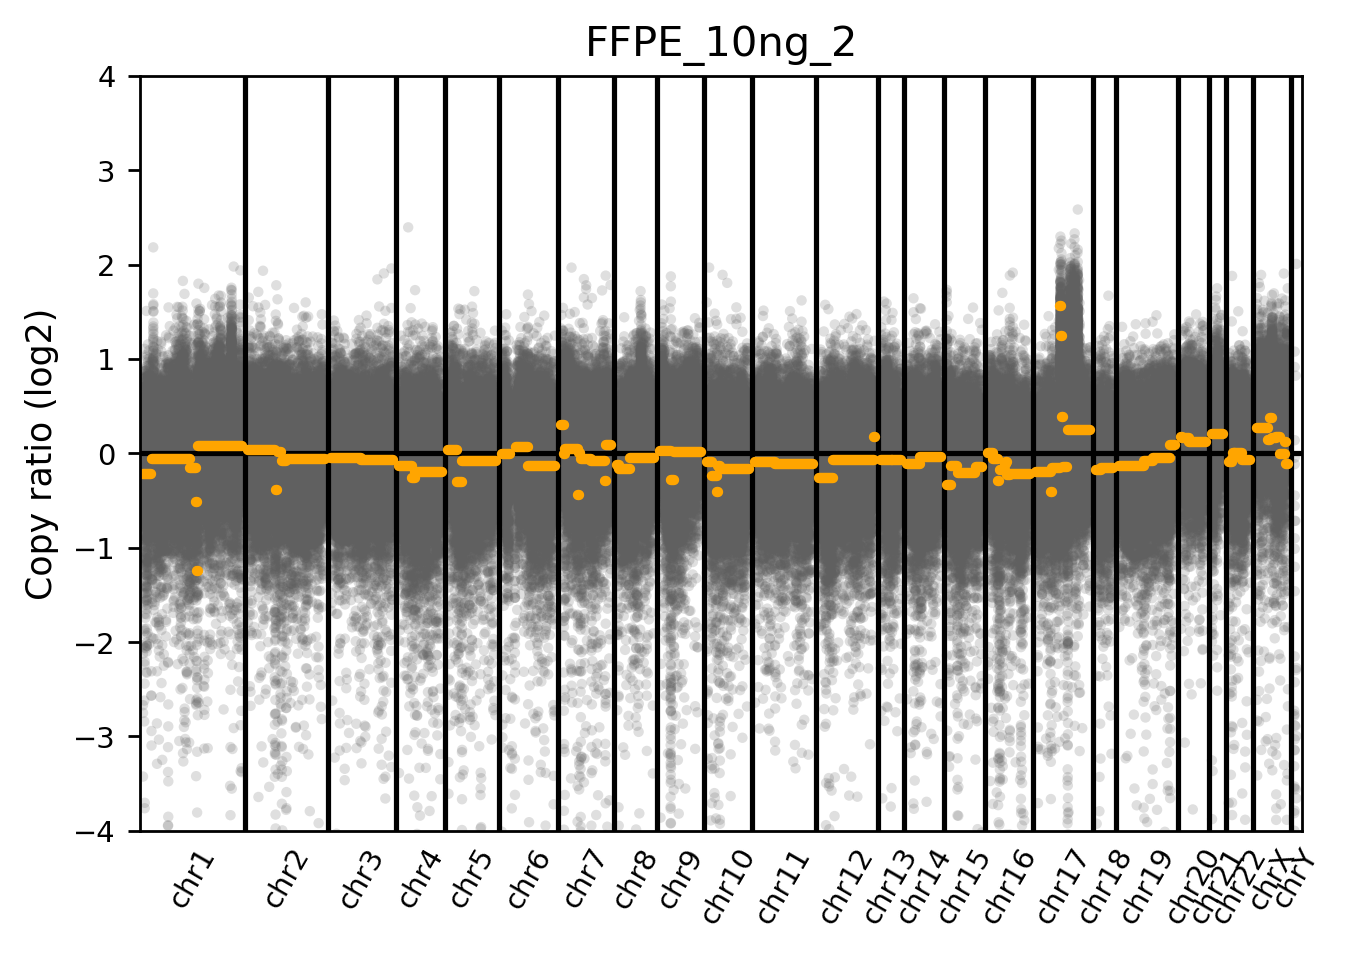

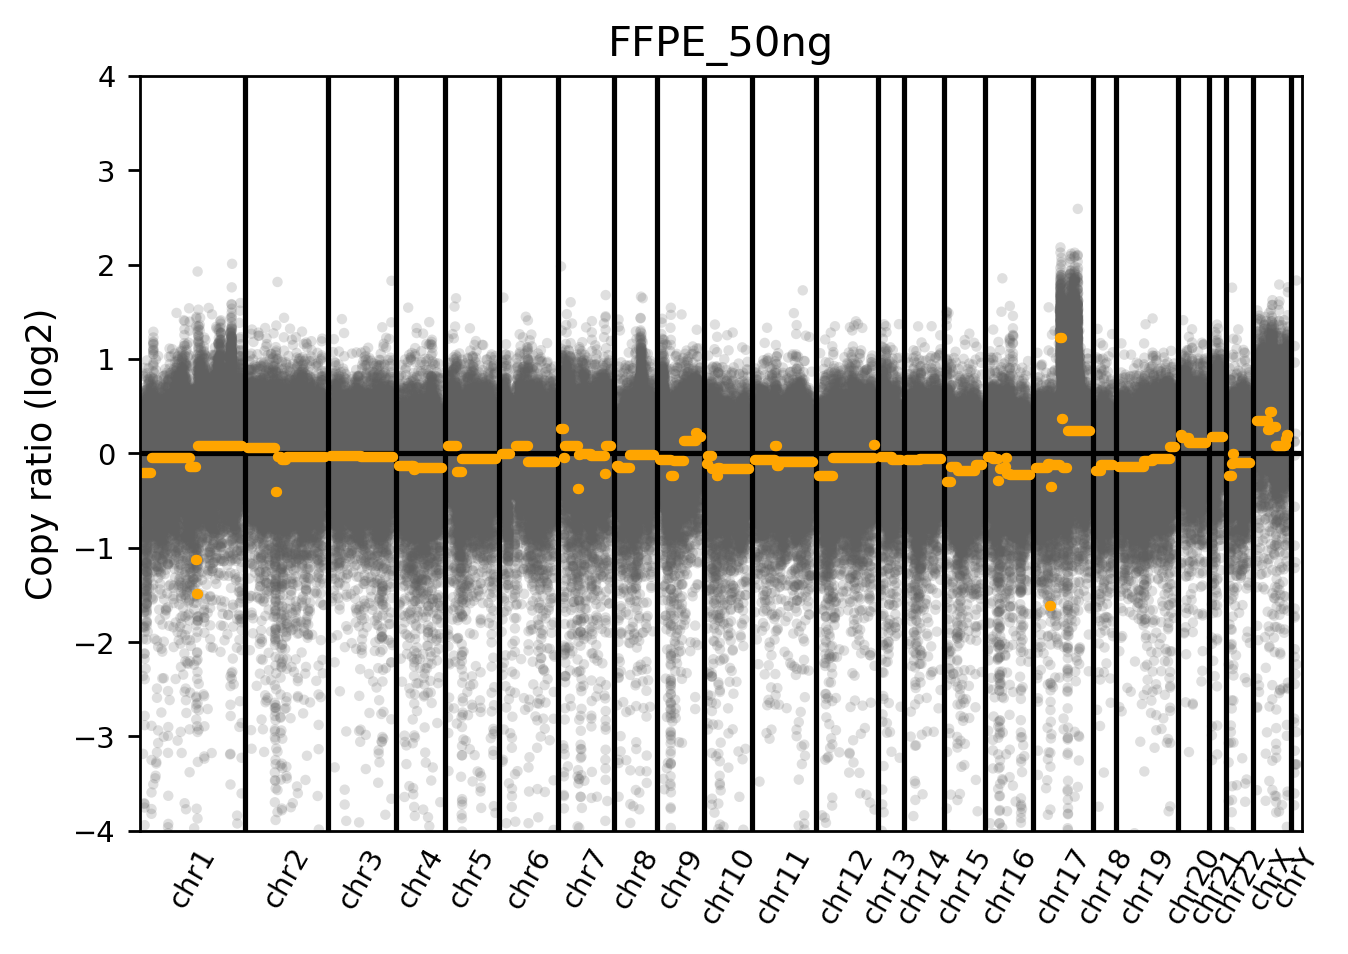

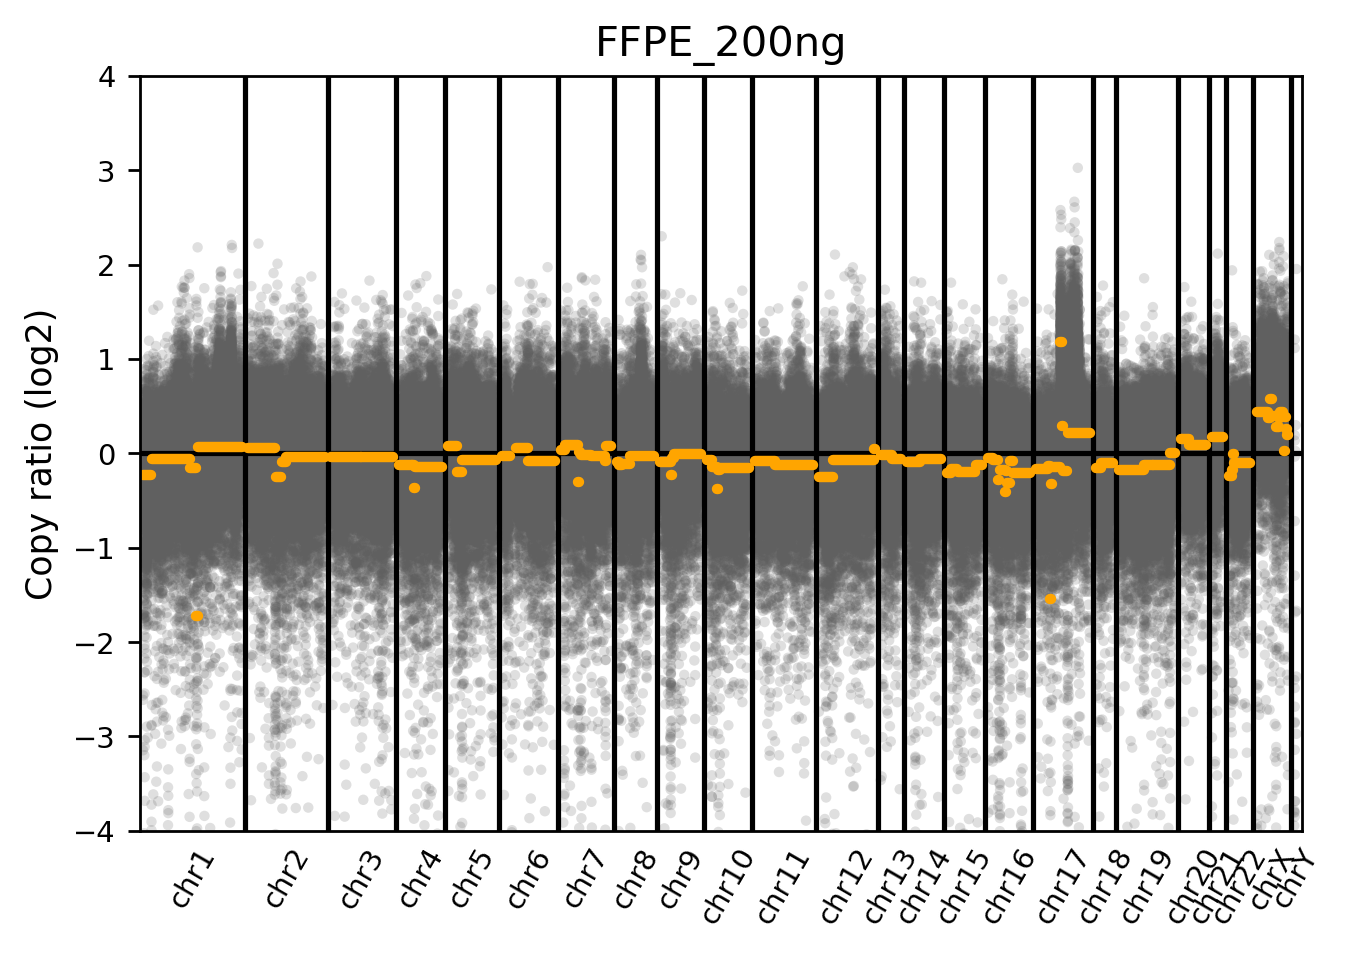

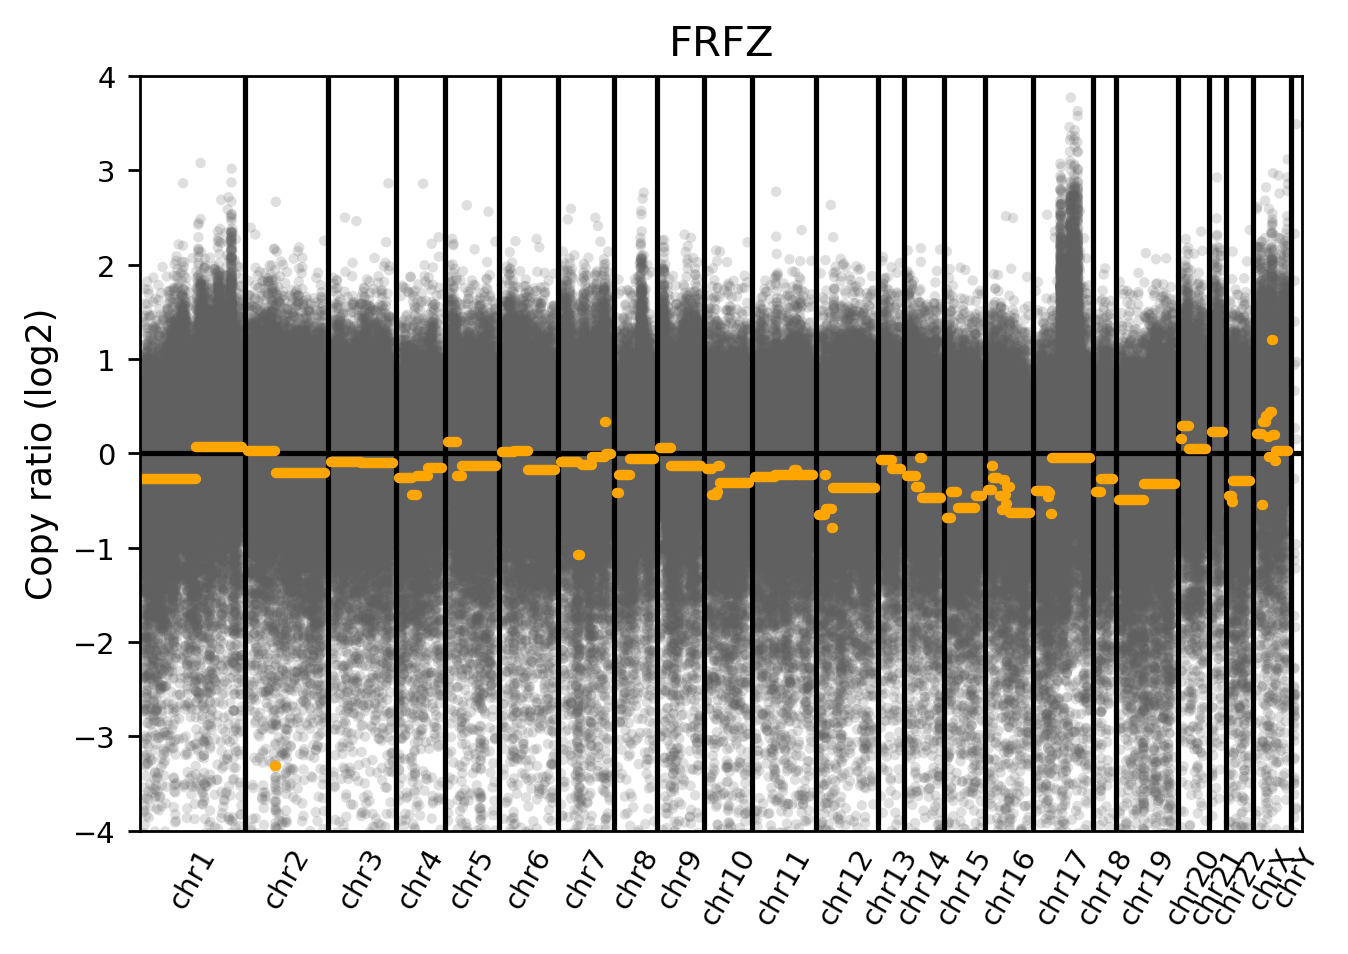

In [17]:
for s in list(sample_names.keys()):
    f_cnr = '../../data/cna_exome_withNORM/{}.cnr'.format(s)
    f_cns = '../../data/cna_exome_withNORM/{}.cns'.format(s)
    a = cnvlib.read(f_cnr,sample_id=s)
    segments = cnvlib.read(f_cns, sample_id=s)
    ax = cnvlib.do_scatter(cnarr=a,
                           segments=segments,
                           title=sample_names[s],
                           by_bin=True,
                            segment_color='orange')

    plt.ylim(-4,4)
plt.show()

KeyboardInterrupt: 

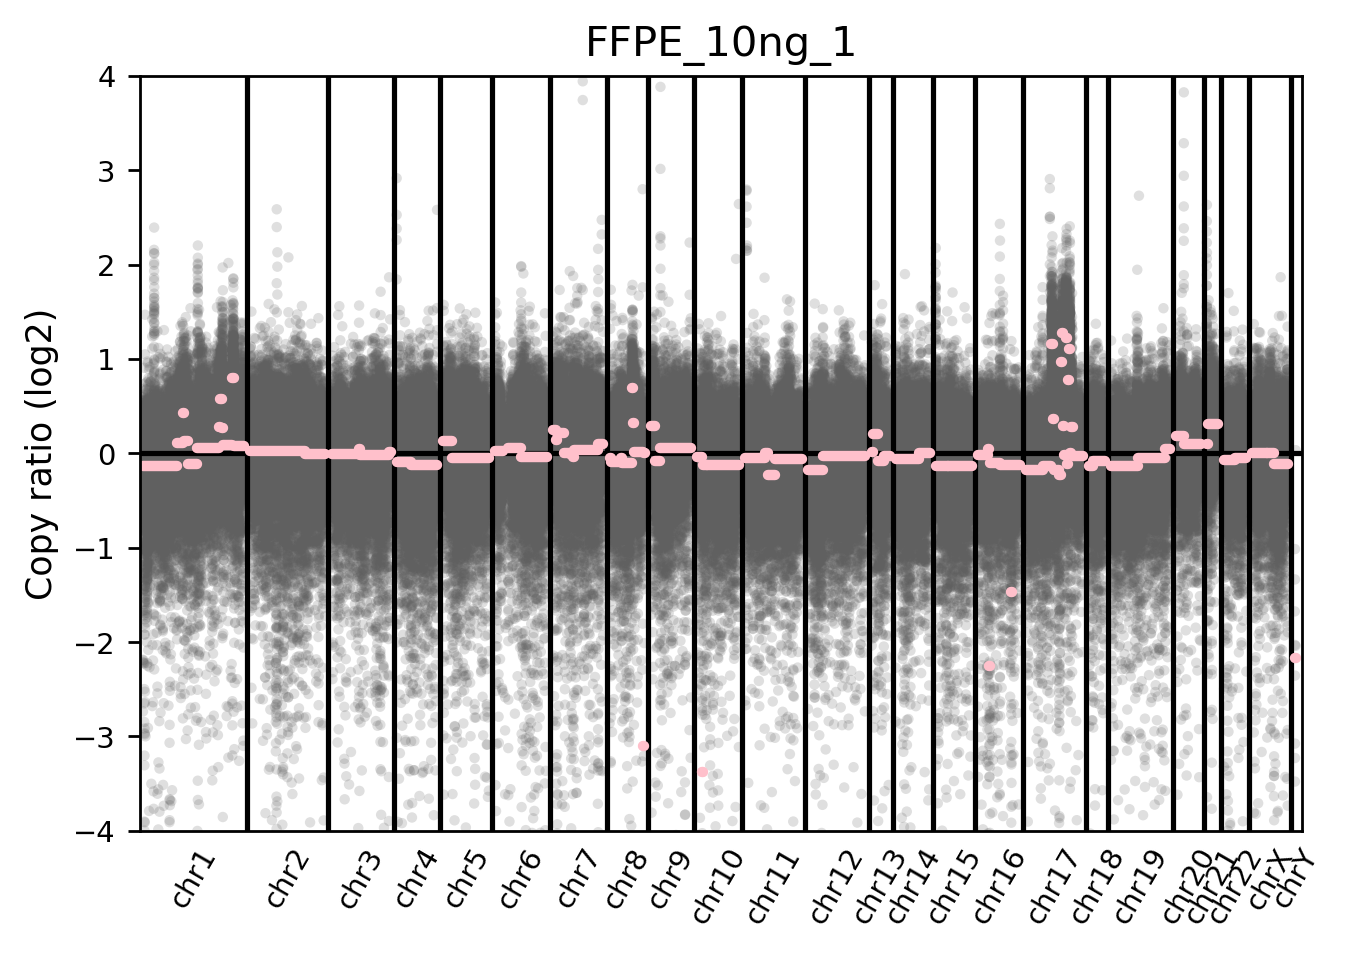

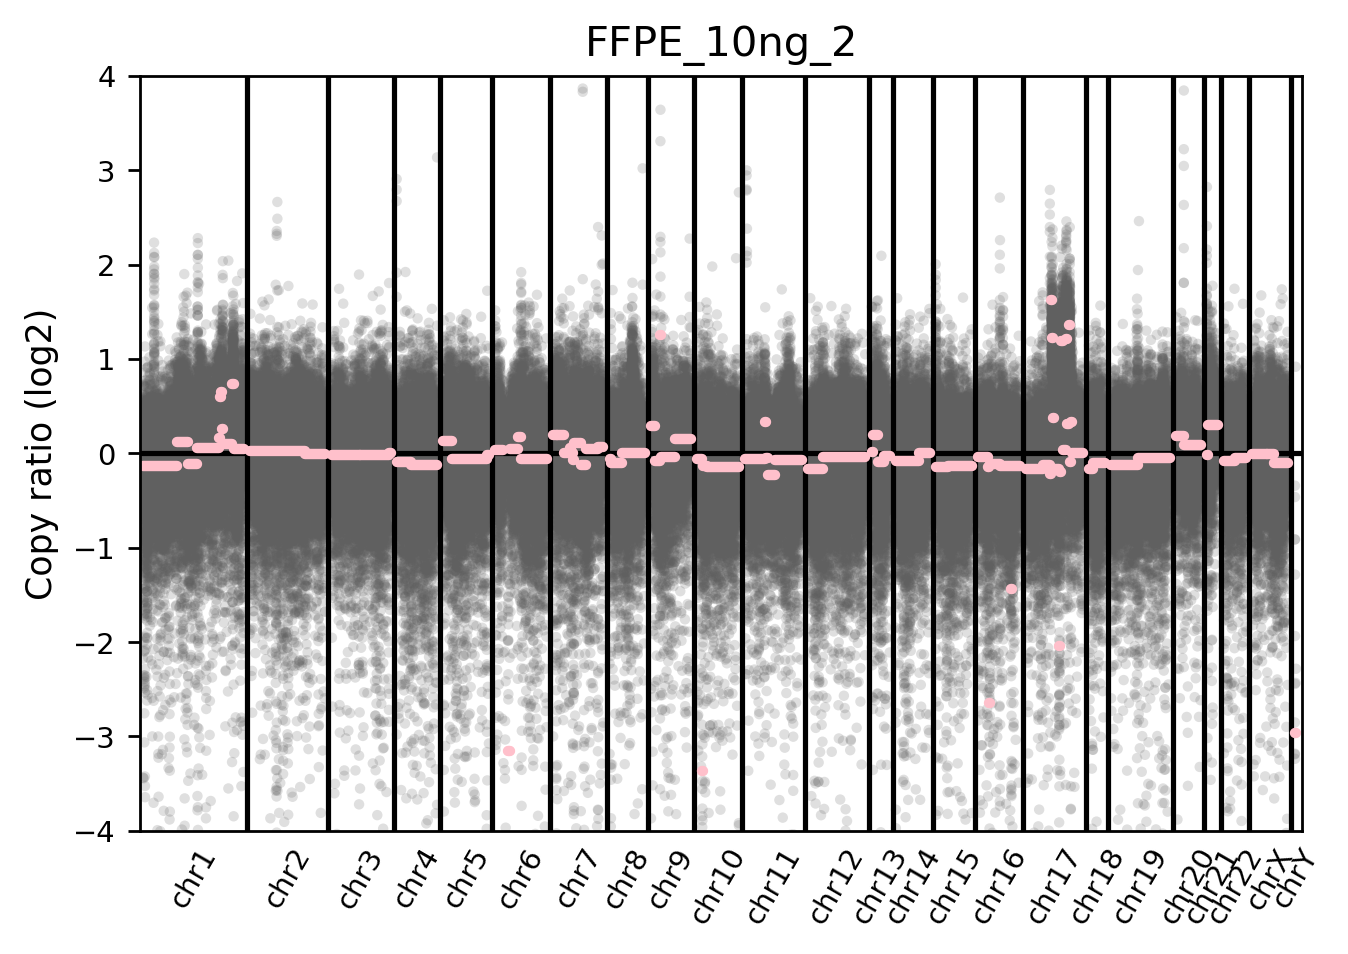

In [11]:
for s in sample_names.keys():
    f_cnr = '../../data/cna_exome_drop_low_coverage/{}.cnr'.format(s)
    f_cns = '../../data/cna_exome_drop_low_coverage/{}.cns'.format(s)
    a = cnvlib.read(f_cnr,sample_id=s)
    segments = cnvlib.read(f_cns, sample_id=s)
    ax = cnvlib.do_scatter(cnarr=a,
                           segments=segments,
                           title=sample_names[s],
                           by_bin=True,
                            segment_color='pink')

    plt.ylim(-4,4)
plt.show()

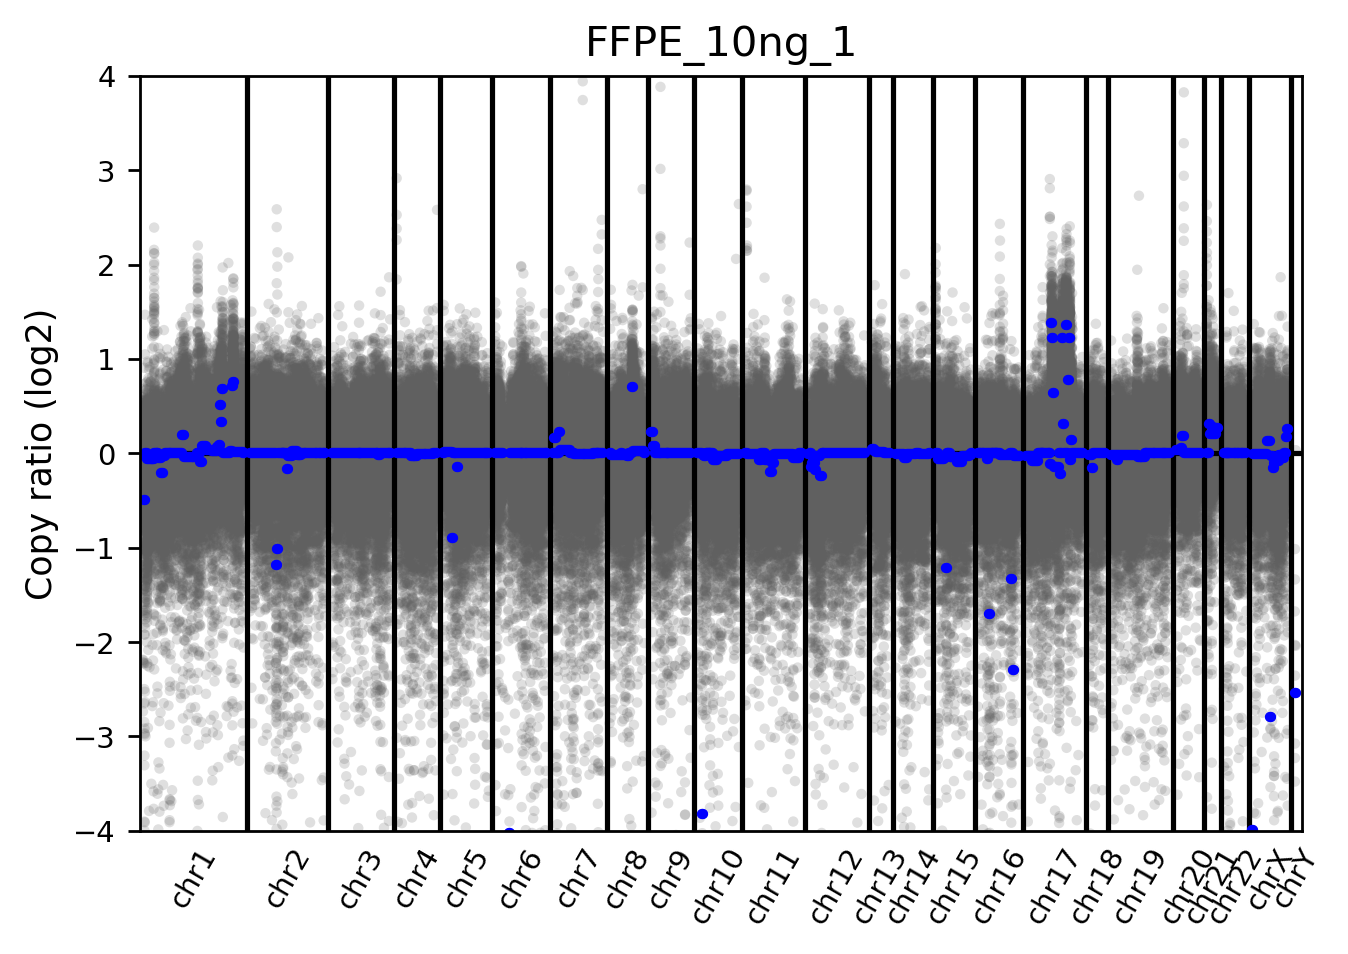

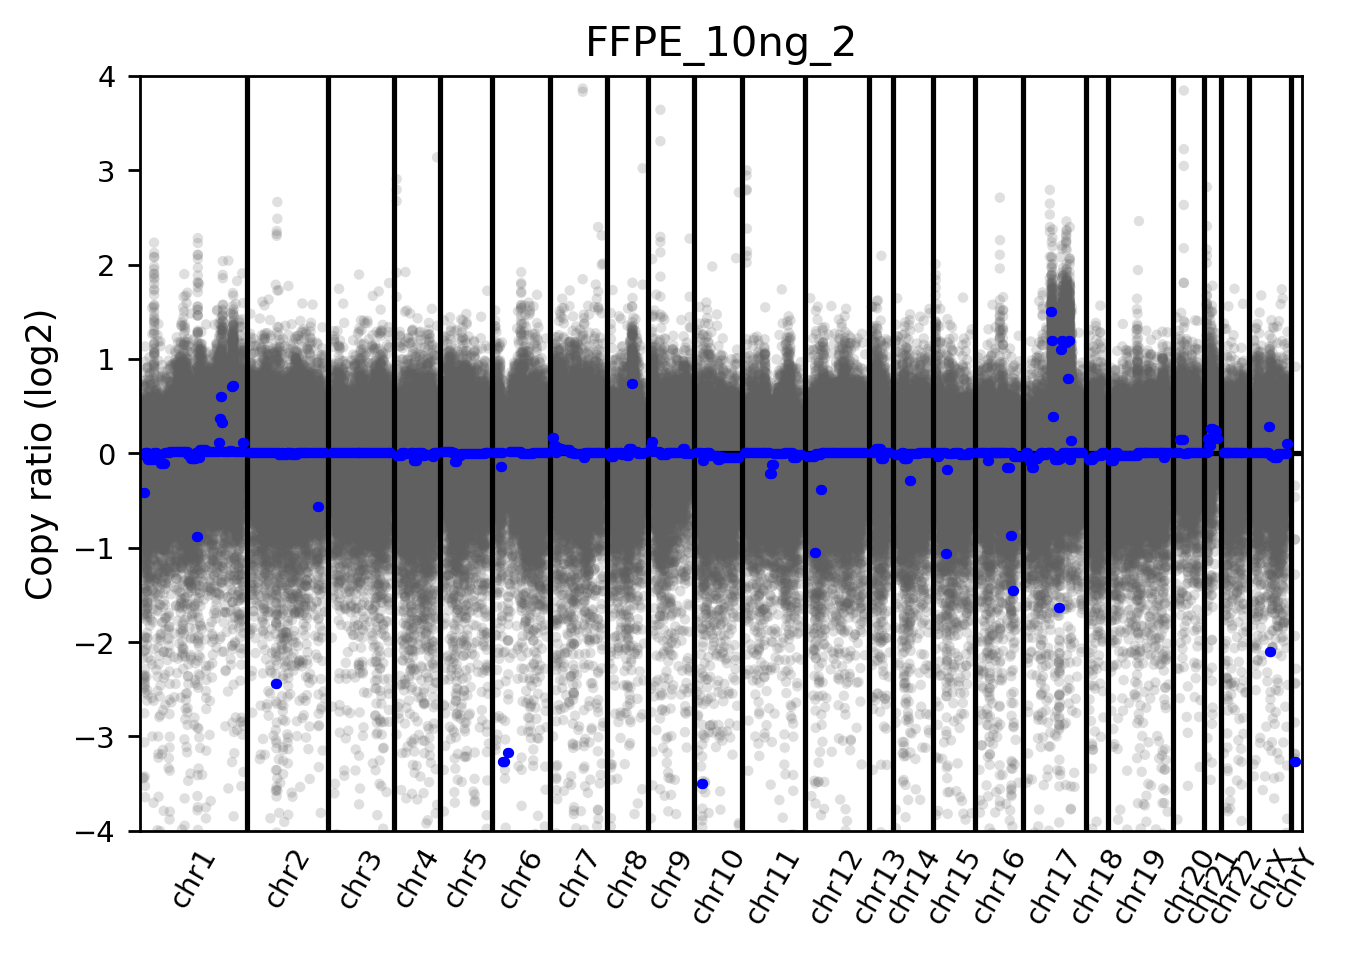

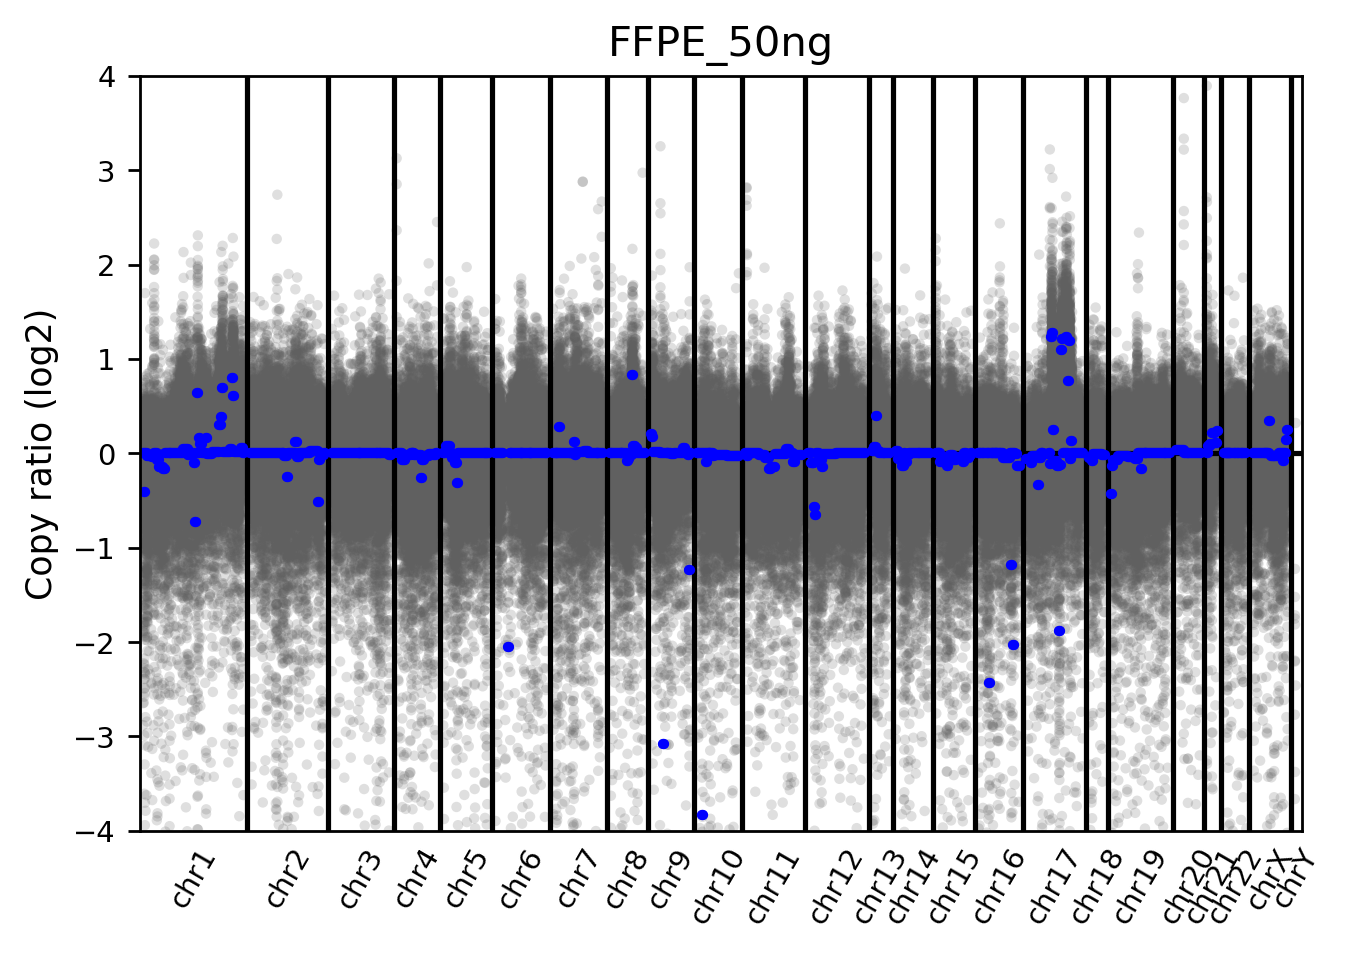

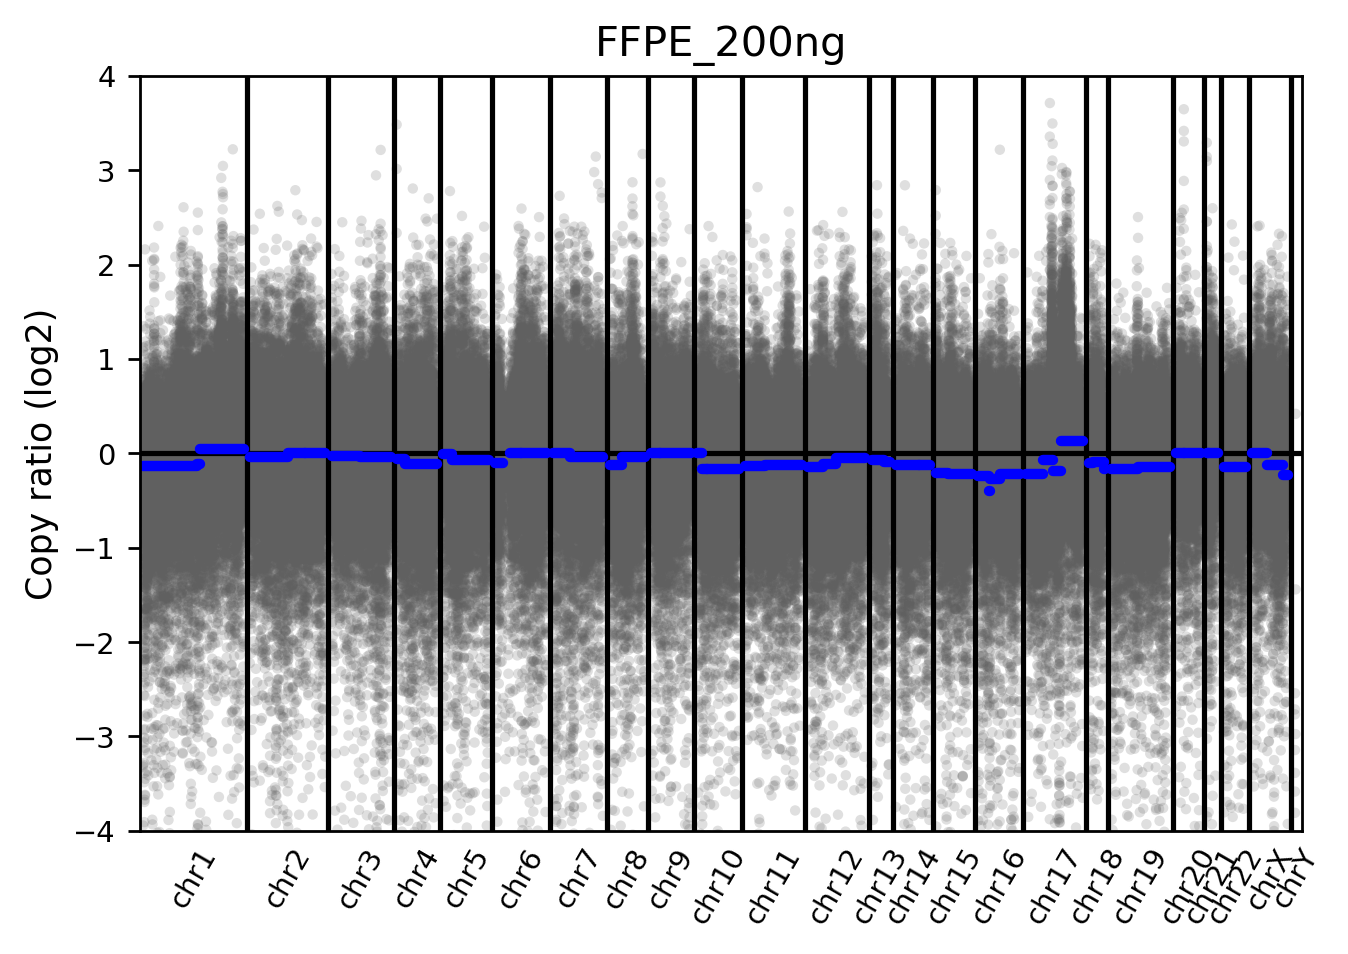

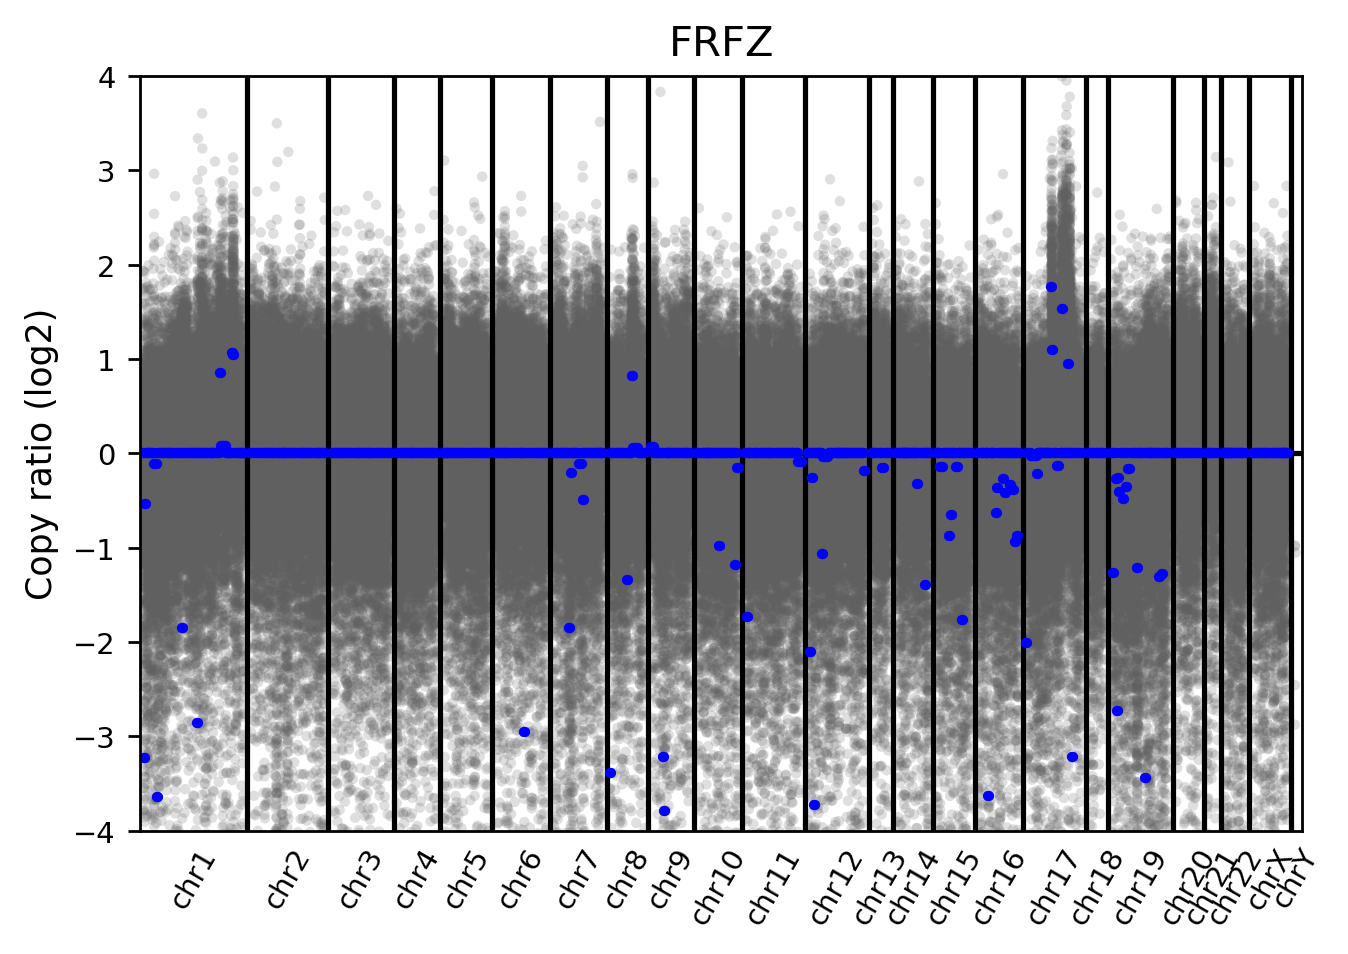

In [53]:
for s in sample_names.keys():
    f_cnr = '../../data/cna_exome_drop_low_coverage/{}.cnr'.format(s)
    f_cns = '../../data/cna_exome_drop_low_coverage/{}.cnr.flasso.cns'.format(s)
    a = cnvlib.read(f_cnr,sample_id=s)
    segments = cnvlib.read(f_cns, sample_id=s)
    ax = cnvlib.do_scatter(cnarr=a,
                           segments=segments,
                           title=sample_names[s],
                           by_bin=True,
                            segment_color='orange')

    plt.ylim(-4,4)
plt.show()

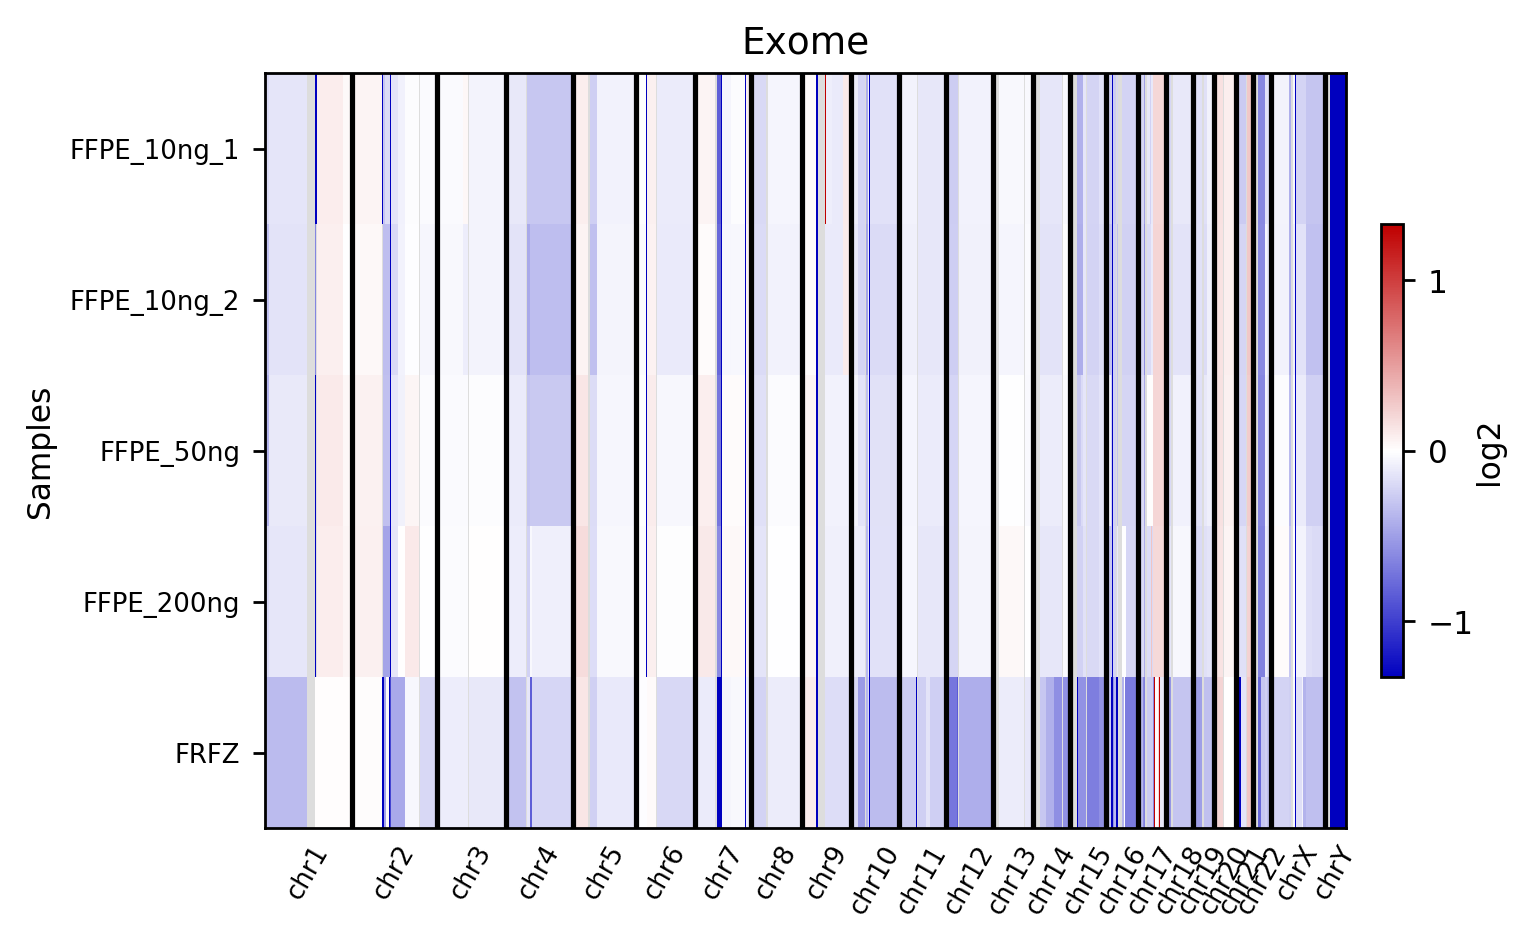

In [85]:
segments = []

for s in sample_names.keys():
    f = '../../data/cna_exome_2/{}.cns'.format(s)
    segments.append(cnvlib.read(f,
                            sample_id=sample_names[s]))
ax = cnvlib.do_heatmap(segments,
                       by_bin=False)
ax.set_title("Exome")
plt.rcParams["font.size"] = 9.0
plt.show()

In [86]:
lst_ = []

for f in glob("../../data/cna_exome_2/*.cns"):
    path = Path(f)
    cns = pd.read_table(f)
    cns
    cns['sample'] = path.stem.split('.')[0]
    lst_.append(cns)

In [87]:
a = pd.concat(lst_)
df = pd.DataFrame(a.groupby(by=['chromosome','start','end','sample'],as_index=False).mean())
print(df.shape)
df = df[df['log2'] > -15]
print(df.shape)

(936, 8)
(717, 8)


In [79]:
df

chromosome      start        end                       sample       log2  \
0         chr1      65509    1567816  1285_covaris2_DNA_10ng_1_S1  -0.241039   
1         chr1      65509    1567816  1285_covaris2_DNA_10ng_2_S2  -0.287634   
2         chr1      65509    1567816   1285_covaris2_DNA_200ng_S4  -0.350431   
3         chr1      65509   13183906    1285_covaris2_DNA_50ng_S3  -0.389370   
6         chr1    1568076    1608168   1285_covaris2_DNA_200ng_S4  -6.437030   
7         chr1    1571718    1608168  1285_covaris2_DNA_10ng_1_S1  -2.146320   
8         chr1    1571718   13183906  1285_covaris2_DNA_10ng_2_S2  -0.322764   
11        chr1    1634934   13183906  1285_covaris2_DNA_10ng_1_S1  -0.187750   
12        chr1    1634934   13475224   1285_covaris2_DNA_200ng_S4  -0.200363   
17        chr1   13802346  121310662  1285_covaris2_DNA_10ng_1_S1  -0.133679   
18        chr1   13802346  121310662  1285_covaris2_DNA_10ng_2_S2  -0.144188   
19        chr1   13802346  121310662   1285_covaris2_DNA_200ng_S4  -0.129750   
20        chr1   13802346  121310662    1285_covaris2_DNA_50ng_S3  -0.116161   
22        chr1  144013834  148014998  1285_covaris2_DNA_10ng_1_S1  -1.867260   
23        chr1  144013834  148014998   1285_covaris2_DNA_200ng_S4  -1.915380   
24        chr1  144013834  148014998    1285_covaris2_DNA_50ng_S3  -1.969530   
25        chr1  144679883  145826975  1285_covaris2_DNA_10ng_2_S2  -0.637918   
27        chr1  146514438  148014998  1285_covaris2_DNA_10ng_2_S2  -0.228253   
32        chr1  148317843  149783905  1285_covaris2_DNA_10ng_1_S1  -2.883540   
33        chr1  149038789  149783905  1285_covaris2_DNA_10ng_2_S2  -0.238329   
34        chr1  149038789  149783905   1285_covaris2_DNA_200ng_S4  -0.822075   
35        chr1  149038789  149783905    1285_covaris2_DNA_50ng_S3  -0.452455   
40        chr1  149858107  223724502  1285_covaris2_DNA_10ng_2_S2   0.082875   
41        chr1  149858107  223724502   1285_covaris2_DNA_200ng_S4   0.092554   
42        chr1  149858107  223724502    1285_covaris2_DNA_50ng_S3   0.107464   
43        chr1  149858107  223727993  1285_covaris2_DNA_10ng_1_S1   0.091567   
48        chr1  223797876  249212623  1285_covaris2_DNA_10ng_1_S1   0.033248   
49        chr1  223797876  249212623  1285_covaris2_DNA_10ng_2_S2  -0.004927   
50        chr1  223797876  249212623   1285_covaris2_DNA_200ng_S4   0.053615   
51        chr1  223797876  249212623    1285_covaris2_DNA_50ng_S3   0.039949   
..         ...        ...        ...                          ...        ...   
661       chrX  119206445  119297728   1285_covaris2_DNA_200ng_S4 -11.697300   
662       chrX  119335846  148631045   1285_covaris2_DNA_200ng_S4  -0.186729   
667       chrX  148685563  148842535  1285_covaris2_DNA_10ng_1_S1  -0.170496   
668       chrX  148685563  148842535  1285_covaris2_DNA_10ng_2_S2  -0.069682   
669       chrX  148685563  148842535   1285_covaris2_DNA_200ng_S4  -0.265707   
670       chrX  148685563  148842535    1285_covaris2_DNA_50ng_S3  -0.163926   
675       chrX  149013072  151870232  1285_covaris2_DNA_10ng_2_S2  -0.238828   
676       chrX  149013072  151870232    1285_covaris2_DNA_50ng_S3  -0.268673   
677       chrX  149013072  151877173  1285_covaris2_DNA_10ng_1_S1  -0.271329   
678       chrX  149013072  153780420   1285_covaris2_DNA_200ng_S4  -0.324864   
679       chrX  151877057  151928423  1285_covaris2_DNA_10ng_2_S2 -14.413000   
682       chrX  151935205  153445546  1285_covaris2_DNA_10ng_1_S1  -0.117002   
683       chrX  151935205  153445546  1285_covaris2_DNA_10ng_2_S2  -0.082174   
684       chrX  151935205  153780420    1285_covaris2_DNA_50ng_S3  -0.061157   
685       chrX  153453404  153520470  1285_covaris2_DNA_10ng_1_S1 -10.608400   
686       chrX  153453404  153520470  1285_covaris2_DNA_10ng_2_S2 -12.518400   
687       chrX  153524174  153593828  1285_covaris2_DNA_10ng_1_S1  -0.095726   
688       chrX  153524174  153593828  1285_covaris2_DNA_10ng_2_S2  -0.098167   
689 

In [88]:
df['segment'] = df['chromosome'] + '_' + df['start'].astype('str') + '_' +  df['end'].astype('str')
df

chromosome      start        end                       sample       log2  \
0         chr1      65509    1567816  1285_covaris2_DNA_10ng_1_S1  -0.241039   
1         chr1      65509    1567816  1285_covaris2_DNA_10ng_2_S2  -0.287634   
2         chr1      65509    1567816   1285_covaris2_DNA_200ng_S4  -0.350431   
3         chr1      65509   13183906    1285_covaris2_DNA_50ng_S3  -0.389370   
4         chr1      65509  121310662                   FRFZ-ready  -0.355341   
7         chr1    1568076    1608168   1285_covaris2_DNA_200ng_S4  -6.437030   
8         chr1    1571718    1608168  1285_covaris2_DNA_10ng_1_S1  -2.146320   
9         chr1    1571718   13183906  1285_covaris2_DNA_10ng_2_S2  -0.322764   
12        chr1    1634934   13183906  1285_covaris2_DNA_10ng_1_S1  -0.187750   
13        chr1    1634934   13475224   1285_covaris2_DNA_200ng_S4  -0.200363   
18        chr1   13802346  121310662  1285_covaris2_DNA_10ng_1_S1  -0.133679   
19        chr1   13802346  121310662  1285_covaris2_DNA_10ng_2_S2  -0.144188   
20        chr1   13802346  121310662   1285_covaris2_DNA_200ng_S4  -0.129750   
21        chr1   13802346  121310662    1285_covaris2_DNA_50ng_S3  -0.116161   
23        chr1  144013834  148014998  1285_covaris2_DNA_10ng_1_S1  -1.867260   
24        chr1  144013834  148014998   1285_covaris2_DNA_200ng_S4  -1.915380   
25        chr1  144013834  148014998    1285_covaris2_DNA_50ng_S3  -1.969530   
26        chr1  144013834  249212623                   FRFZ-ready   0.009564   
27        chr1  144679883  145826975  1285_covaris2_DNA_10ng_2_S2  -0.637918   
29        chr1  146514438  148014998  1285_covaris2_DNA_10ng_2_S2  -0.228253   
34        chr1  148317843  149783905  1285_covaris2_DNA_10ng_1_S1  -2.883540   
35        chr1  149038789  149783905  1285_covaris2_DNA_10ng_2_S2  -0.238329   
36        chr1  149038789  149783905   1285_covaris2_DNA_200ng_S4  -0.822075   
37        chr1  149038789  149783905    1285_covaris2_DNA_50ng_S3  -0.452455   
42        chr1  149858107  223724502  1285_covaris2_DNA_10ng_2_S2   0.082875   
43        chr1  149858107  223724502   1285_covaris2_DNA_200ng_S4   0.092554   
44        chr1  149858107  223724502    1285_covaris2_DNA_50ng_S3   0.107464   
45        chr1  149858107  223727993  1285_covaris2_DNA_10ng_1_S1   0.091567   
50        chr1  223797876  249212623  1285_covaris2_DNA_10ng_1_S1   0.033248   
51        chr1  223797876  249212623  1285_covaris2_DNA_10ng_2_S2  -0.004927   
..         ...        ...        ...                          ...        ...   
876       chrX  119335846  148631045   1285_covaris2_DNA_200ng_S4  -0.186729   
881       chrX  148685563  148842535  1285_covaris2_DNA_10ng_1_S1  -0.170496   
882       chrX  148685563  148842535  1285_covaris2_DNA_10ng_2_S2  -0.069682   
883       chrX  148685563  148842535   1285_covaris2_DNA_200ng_S4  -0.265707   
884       chrX  148685563  148842535    1285_covaris2_DNA_50ng_S3  -0.163926   
889       chrX  149013072  151870232  1285_covaris2_DNA_10ng_2_S2  -0.238828   
890       chrX  149013072  151870232    1285_covaris2_DNA_50ng_S3  -0.268673   
891       chrX  149013072  151877173  1285_covaris2_DNA_10ng_1_S1  -0.271329   
892       chrX  149013072  153780420   1285_covaris2_DNA_200ng_S4  -0.324864   
893       chrX  151877057  151928423  1285_covaris2_DNA_10ng_2_S2 -14.413000   
896       chrX  151935205  153445546  1285_covaris2_DNA_10ng_1_S1  -0.117002   
897       chrX  151935205  153445546  1285_covaris2_DNA_10ng_2_S2  -0.082174   
898       chrX  151935205  153780420    1285_covaris2_DNA_50ng_S3  -0.061157   
899       chrX  153453404  153520470  1285_covaris2_DNA_10ng_1_S1 -10.608400   
900       chrX  153453404  153520470  1285_covaris2_DNA_10ng_2_S2 -12.518400   
901       chrX  153524174  153593828  1285_covaris2_DNA_10ng_1_S1  -0.095726   
902       chrX  153524174  153593828  1285_covaris2_DNA_10ng_2_S2  -0.098167   
903       chrX  153594308  153780420  1285_covaris2_DNA_10ng_1_S1   0.325588   
904 

In [ ]:
df.index.names  = [''.join(str(i)).strip() for i in df.index.values]

In [97]:
max(df['log2'])

2.13469

In [114]:
from pathlib import Path
lst_ = []

for s in sample_names.keys():
    f = '../../data/cna_exome_2/{}.cns'.format(s)
    path = Path(f)
    cns = pd.read_table(f)
    cns = cns[['chromosome','log2']]
    cns = cns.rename(columns={'log2':sample_names[path.stem]})
    lst_.append(cns)

In [115]:
l = lst_[0]
for k in lst_[1:]:
    l = l.merge(k,on=['chromosome'],how='outer')

In [116]:
l.dropna()

chromosome  FFPE_10ng_1  FFPE_10ng_2  FFPE_50ng  FFPE_200ng       FRFZ
0             chr1    -0.241039    -0.287634   -0.38937   -0.350431  -0.355341
1             chr1    -0.241039    -0.287634   -0.38937   -0.350431   0.009564
2             chr1    -0.241039    -0.287634   -0.38937   -6.437030  -0.355341
3             chr1    -0.241039    -0.287634   -0.38937   -6.437030   0.009564
4             chr1    -0.241039    -0.287634   -0.38937  -18.998500  -0.355341
5             chr1    -0.241039    -0.287634   -0.38937  -18.998500   0.009564
6             chr1    -0.241039    -0.287634   -0.38937   -0.200363  -0.355341
7             chr1    -0.241039    -0.287634   -0.38937   -0.200363   0.009564
8             chr1    -0.241039    -0.287634   -0.38937  -23.115600  -0.355341
9             chr1    -0.241039    -0.287634   -0.38937  -23.115600   0.009564
10            chr1    -0.241039    -0.287634   -0.38937   -0.129750  -0.355341
11            chr1    -0.241039    -0.287634   -0.38937   -0.129750   0.009564
12            chr1    -0.241039    -0.287634   -0.38937   -1.915380  -0.355341
13            chr1    -0.241039    -0.287634   -0.38937   -1.915380   0.009564
14            chr1    -0.241039    -0.287634   -0.38937  -20.543100  -0.355341
15            chr1    -0.241039    -0.287634   -0.38937  -20.543100   0.009564
16            chr1    -0.241039    -0.287634   -0.38937   -0.822075  -0.355341
17            chr1    -0.241039    -0.287634   -0.38937   -0.822075   0.009564
18            chr1    -0.241039    -0.287634   -0.38937  -23.501200  -0.355341
19            chr1    -0.241039    -0.287634   -0.38937  -23.501200   0.009564
20            chr1    -0.241039    -0.287634   -0.38937    0.092554  -0.355341
21            chr1    -0.241039    -0.287634   -0.38937    0.092554   0.009564
22            chr1    -0.241039    -0.287634   -0.38937  -22.293600  -0.355341
23            chr1    -0.241039    -0.287634   -0.38937  -22.293600   0.009564
24            chr1    -0.241039    -0.287634   -0.38937    0.053615  -0.355341
25            chr1    -0.241039    -0.287634   -0.38937    0.053615   0.009564
26            chr1    -0.241039    -0.287634  -22.84330   -0.350431  -0.355341
27            chr1    -0.241039    -0.287634  -22.84330   -0.350431   0.009564
28            chr1    -0.241039    -0.287634  -22.84330   -6.437030  -0.355341
29            chr1    -0.241039    -0.287634  -22.84330   -6.437030   0.009564
...            ...          ...          ...        ...         ...        ...
8926000       chrY   -22.350000   -21.916700  -23.51330  -24.029500 -25.780000
8926001       chrY   -22.350000   -21.916700  -23.51330  -24.029500 -26.214200
8926002       chrY   -22.350000   -21.916700  -23.51330  -10.173000 -25.780000
8926003       chrY   -22.350000   -21.916700  -23.51330  -10.173000 -26.214200
8926004       chrY   -22.350000   -21.916700  -23.51330  -24.634300 -25.780000
8926005       chrY   -22.350000   -21.916700  -23.51330  -24.634300 -26.214200
8926006       chrY   -22.350000   -21.916700  -23.51330   -6.785050 -25.780000
8926007       chrY   -22.350000   -21.916700  -23.51330   -6.785050 -26.214200
8926008       chrY   -22.350000   -21.916700  -23.51330  -23.951900 -25.780000
8926009       chrY   -22.350000   -21.916700  -23.51330  -23.951900 -26.214200
8926010       chrY   -22.350000   -21.916700   -7.24548  -24.029500 -25.780000
8926011       chrY   -22.350000   -21.916700   -7.24548  -24.029500 -26.214200
8926012       chrY   -22.350000   -21.916700   -7.24548  -10.173000 -25.780000
8926013       chrY   -22.350000   -21.916700   -7.24548  -10.173000 -26.214200
8926014       chrY   -22.350000   -21.916700   -7.24548  -24.634300 -25.780000
8926015       chrY   -22.350000   -21.916700   -7.24548  -24.634300 -26.214200
8926016       chrY   -22.350000   -21.916700   -7.24548   -6.785050 -25.780000
8926017       chrY   -22.350000   -21.916700   -7.24548   -6.785050 -26.214200
8926018       chrY   -22.350000   -21.916700   -7.24548  -

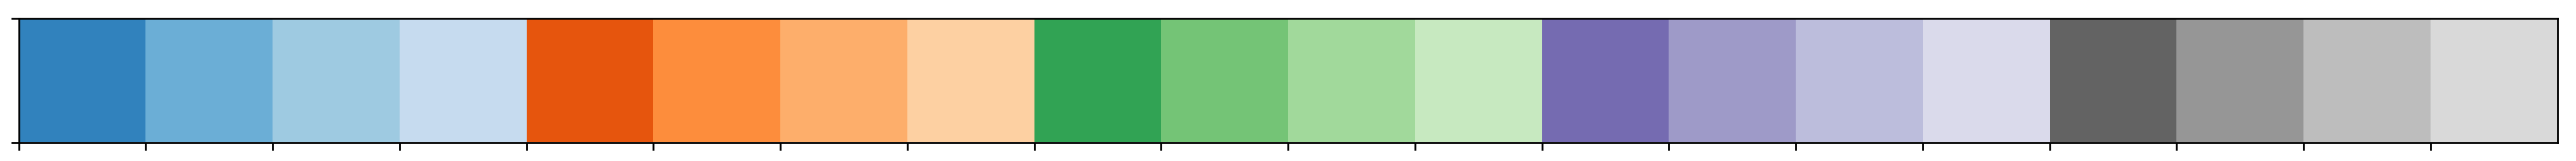

In [100]:
color_scale = sns.color_palette('tab20c').as_hex()
sns.palplot(color_scale)

In [101]:
colors= dict(zip(l.columns[2:-1],color_scale[8:12] + color_scale[:4] +  [color_scale[13]] + [color_scale[4]]))

/Users/DanielaNachmanson/XTHS-analysis/environment/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


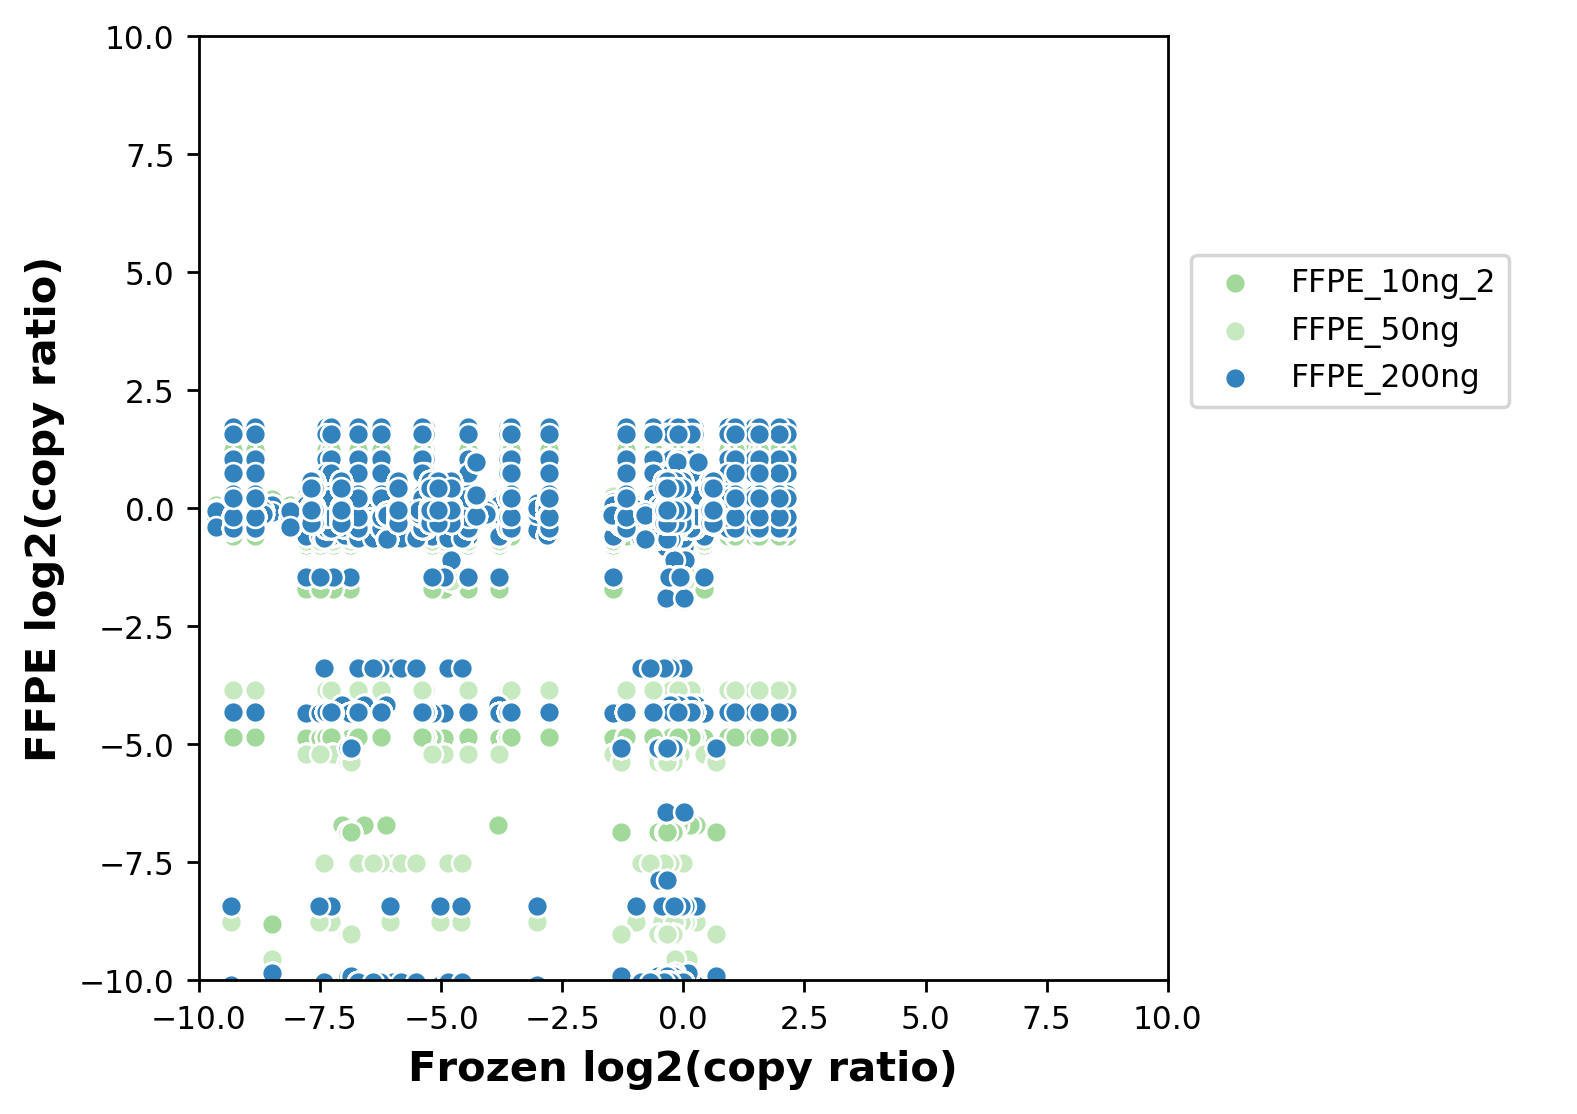

In [117]:
#l = l.fillna(0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

for s in l.columns[2:]:
    if s == 'FRFZ':
        continue
    sns.scatterplot(x=l['FRFZ'],
                    y=l[s],
                    label=s,
                    ax=ax,
                    color=colors[s])
ax.legend().set_visible(False)

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
fig.legend(bbox_to_anchor=(1.22, .7), ncol=1)
ax.set_ylabel('FFPE log2(copy ratio)',
             fontsize=12,
             fontweight='bold')
ax.set_xlabel('Frozen log2(copy ratio)',
             fontsize=12,
             fontweight='bold')
fig.show()